##  KPIs + שאלה עסקית 

###### מטרת הפרויקט היא להבין האם למגיפת הקורונה ו/או לאיזורים בשיקגו יש השפעה על כמות וסוג הפשיעה.

1- האם קיים קשר בין אזור בשיקגו לכמות וסוג הפשעים ולאחוז העצורים?

1 KPI-  יותר מ50% מהפשעים בשיקגו קרו באותו אזור

2 KPI- יותר מ50% מהפשעים באותו אזור בשיקגו הם מאותו הסוג

3 KPI- אחוז העצורים מסך הפשעים באזור הפשיעה הנפוץ במדינה גדול מאחוז העצורים מסך הפשעים בשאר האזורים


2- האם יש קשר בין מגפת הקורונה(שנת 2020- שיא המגפה) לכמות וסוג הפשעים?

הגדרה: תקופת הקורונה – שנת 2020, אינטרוול זמן זהה בתקופה סטנדרטית – שנת 2022

1 KPI- כמות פשעים ממוצעת בתקופת הקורונה גדולה ביותר מ30% מכמות הפשעים באינטרוול זמן זהה בתקופה סטנדרטית 

2 KPI- יחס גניבות בשווי גבוה מ500$ בתקופת הקורונה גדול יותר מאותו היחס באינטרוול זמן זהה בתקופה סטנדרטית

3 KPI- עלייה של 50% במספר פשעים במשפחה בזמן מגפת הקורונה לעומת מספר פשעים במשפחה באינטרוול זמן זהה בתקופה סטנדרטית


כל המדדים הוגדרו תחילה תוך חשיבה על היותם ספציפיים לשאלת המחקר, מדידים וברי השגה בעזרת העמודות הנתונות בטבלאות הנתונים, רלוונטיים בכך שיקדמו ויבססו את תובנותינו לגבי שאלת המחקר ותחומים בזמן.

## Data Warehouse הגדרת 

סכמת הנתונים שבחרנו עבור הדאטה שלנו היא סכמת STAR מכיוון שה Data Warehouse שלנו מכיל שתי טבלאות בלבד, טבלת Fact וטבלת Dimensions. בנוסף, מכיוון שהKPI'S והמדדים של הפרויקט מצריכים שימוש בשתי טבלאות אלו בלבד אין טעם (ולמעשה גם לא ניתן כלל) להשתמש בSnowflake. 

תיאור את ה Data Warehouse לאחר שילוב הסכימה באמצעות ERD -

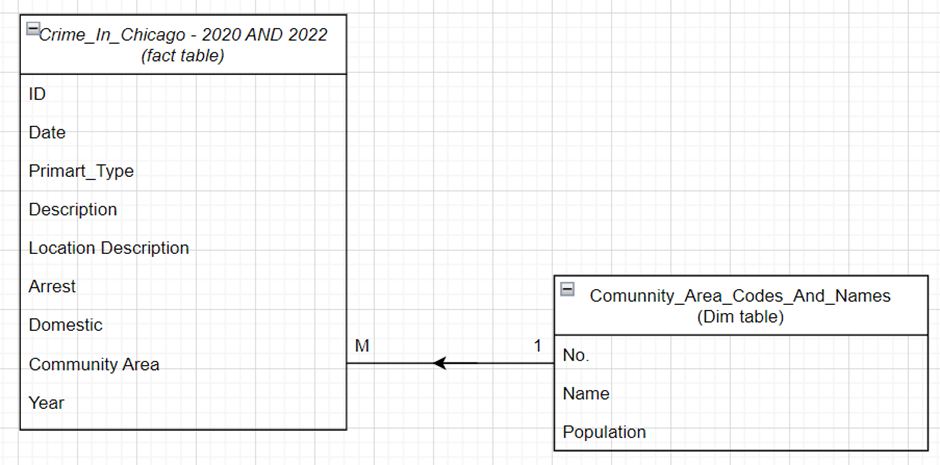 

בעקבות שאלות המחקר ומדדי הKPI שהגדרנו, בחרנו להציג את כמות הפשעים על פי חלוקה ל Community Areas ללא התייחסות למספר הבלוק/שם הרחוב בו התבצע הפשע ולכן בחרנו בטבלת Community Area (בעלת קוד סידורי) ואותה חיברנו לטבלת הFact. 

במצב בו היינו רוצים לבחון את מספר הבלוק/שם הרחוב בו התבצע הפשע, היינו טוענים טבלה נוספת ומחברים אותה לטבלת ה Community Area ורק אז לטבלת הfact. ככל הנראה, במצב המתואר סכמת Snowflake הנה המתאימה ביותר.


## תהליך הETL

מקור הדאטה שלנו הוא שתי טבלאות Exel, לכן כחלק מתהליך הETL ביצענו שני תהליכי STTM (אחד לכל טבלת דאטה), כאשר בכל אחד עשינו סינון ומיפוי לעמודות הנדרשות כדי לענות על השאלות ומטרת הפרויקט שלנו.
בתהליך הSTTM השתמשנו בפעולות transform שכללו שתי פעולות : פעולה אחת (CLEAN_STRING) שמנקה רווחים מהטקסט ומקטינה את כל האותיות ופעולה שנייה (CAPITAL_LETTER) שמנקה רווחים מהטקסט, והופכת את האותיות לקטנות למעט האותיות הראשונות שיהיו גדולות.

בטבלה הראשונה, ביצענו מיפוי של 9 עמודות מתוך 12 והשתמשנו בפעולות transform על עמודות PrimaryType , Description  LocationDescription.

בטבלה השנייה, ביצענו מיפוי של 3 עמודות מתוך 7 והשתמשנו בפעולות tranform על עמודה AreaName. 

## ניתוח הData Warehouse

#### 1-	האם קיים קשר בין אזור בשיקגו לכמות וסוג הפשעים ולאחוז העצורים?


1 KPI -  יותר מ50% מהפשעים בשיקגו קרו באותו אזור

שאילתה זו תחזיר כפלט את האיזור בעיר וכמות הפשעים שבוצעו באותו האיזור ותאפשר לנו להציג ולענות על ה-KPI.


SELECT AreasCodesandNames.Name, COUNT(SampleDataAfterSTTM1000Rows.ID) OVER (PARTITION BY AreasCodesandNames.ID) AS TotCrimes 
FROM AreasCodesandNames INNER JOIN SampleDataAfterSTTM1000Rows 
ON AreasCodesandNames.ID = SampleDataAfterSTTM1000Rows.CommunityArea
ORDER BY TotCrimes DESC

2 KPI- יותר מ50% מהפשעים באותו אזור בשיקגו הם מאותו הסוג

שאילתה זו תחזיר כפלט את האיזור בעיר, לצד סוג הפשע וכמות הפשעים שבוצעו באותו האיזור ותאפשר לנו להציג ולענות על ה-KPI בכך שנוכל לסווג את סוג הפשעים והכמות בכל איזור.

SELECT AreasCodesandNames.Name, SampleDataAfterSTTM1000Rows.PrimaryType, COUNT(SampleDataAfterSTTM1000Rows.ID) OVER (PARTITION BY AreasCodesandNames.ID,SampleDataAfterSTTM1000Rows.PrimaryType) AS TotCrimes
FROM AreasCodesandNames INNER JOIN SampleDataAfterSTTM1000Rows 
  ON AreasCodesandNames.ID = SampleDataAfterSTTM1000Rows.CommunityArea
  ORDER BY TotCrimes DESC

3 KPI - אחוז העצורים מסך הפשעים באזור הפשיעה הנפוץ במדינה גדול מאחוז העצורים מסך הפשעים בשאר האזורים

שאילתה זו היא שאילתה מקוננת. פלט השאילתה הפנימית יהיה שורה אחת בלבד, בגלל פונקצית הLIMIT, אשר יציג את שם האיזור, מספר האיזור הייחודי ומס' הפשעים אשר בוצעו באיזור עם הכי הרבה פשעים במדינה. לאחר מכן, בשאילתה החיצונית, נציג כפלט אך ורק את האיזור עם כמות הפשעים הרבה ביותר ולצידו נציג את כמות הפשעים והעצורים באותו האיזור. פלט זה יאפשר לנו לענות על KPI זה.

SELECT S1.Name,COUNT(SampleDataAfterSTTM1000Rows.ID) AS TotArrested , S1.TotCrimes
FROM SampleDataAfterSTTM1000Rows INNER JOIN  
(SELECT AreasCodesandNames.ID AS ID,AreasCodesandNames.Name AS   Name,COUNT(SampleDataAfterSTTM1000Rows.ID) OVER (PARTITION BY AreasCodesandNames.ID) AS TotCrimes 
FROM AreasCodesandNames INNER JOIN SampleDataAfterSTTM1000Rows 
ON AreasCodesandNames.ID = SampleDataAfterSTTM1000Rows.CommunityArea
ORDER BY TotCrimes DESC
 LIMIT 1 ) AS S1 
ON SampleDataAfterSTTM1000Rows.CommunityArea = S1.ID AND SampleDataAfterSTTM1000Rows.Arrest = TRUE

שאילתה מקוננת זאת, תחזיר את שאר האיזורים ללא האיזור עם מס' הפשעים הגדול ביותר ואת מס' הפשעים והעצורים בכל איזור ובכך נוכל לענות על KPI זה.


SELECT  D1.Name ,COUNT(F1.ID) OVER (PARTITION BY F1.CommunityArea) AS TotArrested
FROM SampleDataAfterSTTM1000Rows AS F1 ,(SELECT SampleDataAfterSTTM1000Rows.communityarea AS ID ,COUNT(SampleDataAfterSTTM1000Rows.ID) OVER (PARTITION BY SampleDataAfterSTTM1000Rows.communityarea) AS TotCrimes  
										FROM SampleDataAfterSTTM1000Rows 
 										ORDER BY TotCrimes DESC
    									LIMIT 1) AS S1 , AreasCodesandNames AS D1
WHERE F1.communityarea <> S1.ID AND F1.Arrest = TRUE AND D1.ID = F1.communityarea
ORDER BY TotArrested DESC


השאילתה מחשבת את המספר הכולל של פשעים בכל אזור , את ממוצע האוכלוסייה בכל אזור ועוד עמודה של היחס בין כמות פשעים לכמות תושבים באותו איזור. זה יעוזר לעמוד את היחס בכל איזור בעיר בין כמות הפשעים לכמות תושבים לצד ממוצע התושבים הכללי בכל עיר.


SELECT CommunityArea, COUNT(*) AS TotalCrimes, 
	    AVG(Population2020) AS AveragePopulation,
                ROUND(100 * COUNT(*) / Population2020, 2) AS CrimeRatio
FROM SampleDataAfterSTTM1000Rows INNER JOIN AreasCodesandNames
ON SampleDataAfterSTTM1000Rows.CommunityArea = AreasCodesandNames.AreaNumber
GROUP BY CommunityArea
ORDER BY TotalCrimes;

שאילתה זו מחזירה האיזור בעיר, שנה, כמות פשעים שבוצעו בתוך המשפחה ואת היחס בין כמות הפשעים במשפחה לכמות האוכלוסיה באיזור. היא מחזירה זאת לפי סוג איזור ושנה ובסדר יורד שלהם.

SELECT  CommunityArea, Year, Population2020, SUM(CASE WHEN Domestic = "TRUE" THEN 1 ELSE 0 END) AS TotalDomesticCrimes, ROUND(100 * SUM(CASE WHEN Domestic = "TRUE" THEN 1 ELSE 0 END) / Population2020, 2) AS DomesticCrimeRate
FROM SampleDataAfterSTTM1000Rows
INNER JOIN AreasCodesandNames ON SampleDataAfterSTTM1000Rows.CommunityArea = AreasCodesandNames.AreaNumber
GROUP BY CommunityArea, Year
ORDER BY CommunityArea, Year;

שאילתה זו מחזירה האיזור בעיר, שנה, כמות עצורים בכל איזור, יחס בין הכמות עצורים לפשעים בכל איזור.
היא מחזירה זאת לפי סוג איזור ובסדר יורד של כמות עצורים.


SELECT CommunityArea, Year, Population2020, SUM(CASE WHEN Arrest = "TRUE"  THEN 1 ELSE 0 END) AS TotaArrestedCrimes, ROUND(100 * SUM(CASE WHEN Arrest = "TRUE" THEN 1 ELSE 0 END) / Population2020, 2) AS ArrestedCrimeRate
FROM SampleDataAfterSTTM1000Rows INNER JOIN AreasCodesandNames
ON SampleDataAfterSTTM1000Rows.CommunityArea = AreasCodesandNames.AreaNumber 
GROUP BY CommunityArea
ORDER BY TotaArrestedCrimes

#### 2- האם יש קשר בין מגפת הקורונה(שנת 2020- שיא המגפה) לכמות וסוג הפשעים?
#### הגדרה: תקופת הקורונה – שנת 2020, אינטרוול זמן זהה בתקופה סטנדרטית – שנת 2022



1 KPI - כמות פשעים ממוצעת בתקופת הקורונה גדולה ביותר מ30% מכמות הפשעים באינטרוול זמן זהה בתקופה סטנדרטית

שאילתה זו תציג עבור כל שנה את מספר הפשעים שקרו בה, ע"י כך נראה האם ישנה עליה/ירידה בכמות פשעים הממוצעת בתקופת הקורונה אל מול כמות הפשעים באינטרוול זמן זהה בתקופה סטנדרטית.


SELECT F1.Year, COUNT(F1.ID) OVER (PARTITION BY F1.year) AS Number_Of_Crimes 
FROM SampleDataAfterSTTM1000Rows  AS F1;

2 KPI - יחס גניבות בשווי גבוה מ500$ בתקופת הקורונה גדול יותר מאותו היחס באינטרוול זמן זהה בתקופה סטנדרטית

בדומה לשאילתה הקודמת, שאילתה זו תציג את מספר הפשעים אשר סווגו כ"מעל 500$" לפי כל שנה. על ידי כך נוכל להבין ולהציג את היחס ביניהם. 

SELECT F1.Year, COUNT(F1.ID) OVER (PARTITION BY F1.year) AS Crimes_Over_500
FROM SampleDataAfterSTTM1000Rows AS F1
WHERE F1.Description = "Over 500”;

3 KPI - עלייה של 50% במספר פשעים במשפחה בזמן מגפת הקורונה לעומת מספר פשעים במשפחה באינטרוול זמן זהה בתקופה סטנדרטית


שאילתה זו תציג את מספר הפשעים אשר סווגו כפשעים בתוך המשפחה (על ידי עמודת הDomestic בה הערכים הם בוליאנים) בחלוקה לפי שנים. על ידי כך נוכל להבין ולסיק האם ישנה עליה/ירידה במספר הפשעים במשפחה בזמן מגפה אל מול אינטרוול זמן זהה בתקופה סטנדרטית.

SELECT F1.Year, COUNT(F1.ID) OVER (PARTITION BY F1.year) AS Domestic_Crimes
FROM SampleDataAfterSTTM1000Rows AS F1
WHERE F1.Domestic = "True”;

## מסקנות 

השאילתות שכתבנו, מספקות מידע חשוב על התמונה הכוללת של מצב הפשעים בשיקגו בשנים 2020-2022. על סמך הפלט של השאילתות הנ"ל, ניתן להסיק כי ישנם אזורים בעיר שסובלים מכמות גבוהה יותר של פשעים ביחס לאזורים אחרים בעיר וכי נכון יהיה לתת תשומת לב יחודית במדיניות הבטחון והאכיפה באזורים אלו.  כמו כן, ניתן לזהות את סוגי הפשעים המרכזיים בכל אזור, ניתן יהיה לפתח דרכי התמודדות יחודיות עבור סוגי הפשעים הנפוצים ביותר ולהוביל בתקווה להפחתתם ומניעתם. בנוסף, ניתן לזהות מגמות שונות ביחס לכמות הפשעים המתרחשים במשפחות/בתים ומספר המעצרים המתרחשים בפועל.

**באופן כללי, הפרויקט העניק לנו כלים להבנת חשיבות ניתוח המידע וביצוע שלבים מקדימים להכנת הדאטה לפני תחילת העבודה. בנוסף, למדנו לעבוד כצוות בצורה יעילה ונוחה בעזרת פלטפורמת git אשר מייושמת בתעשייה.**